True A1 = 0.502574886499268, f1 = 8.269633176518623, ceta1 = 4.079967851712843, b1 = 2.762235553436485
True A2 = 1.5919532161531458, f2 = 22.309203374307362, ceta2 = 3.0291761079724275, b2 = 1.7610981401297177
Estimated A1 = 99.8779516312332, f1 = 0.12407588339771085, ceta1 = 4.076025039131393, b1 = -93.69158882216664
Estimated A2 = 292.41224507369054, f2 = 0.0719756039500002, ceta2 = 5.914081164897895, b2 = -94.34052972137415


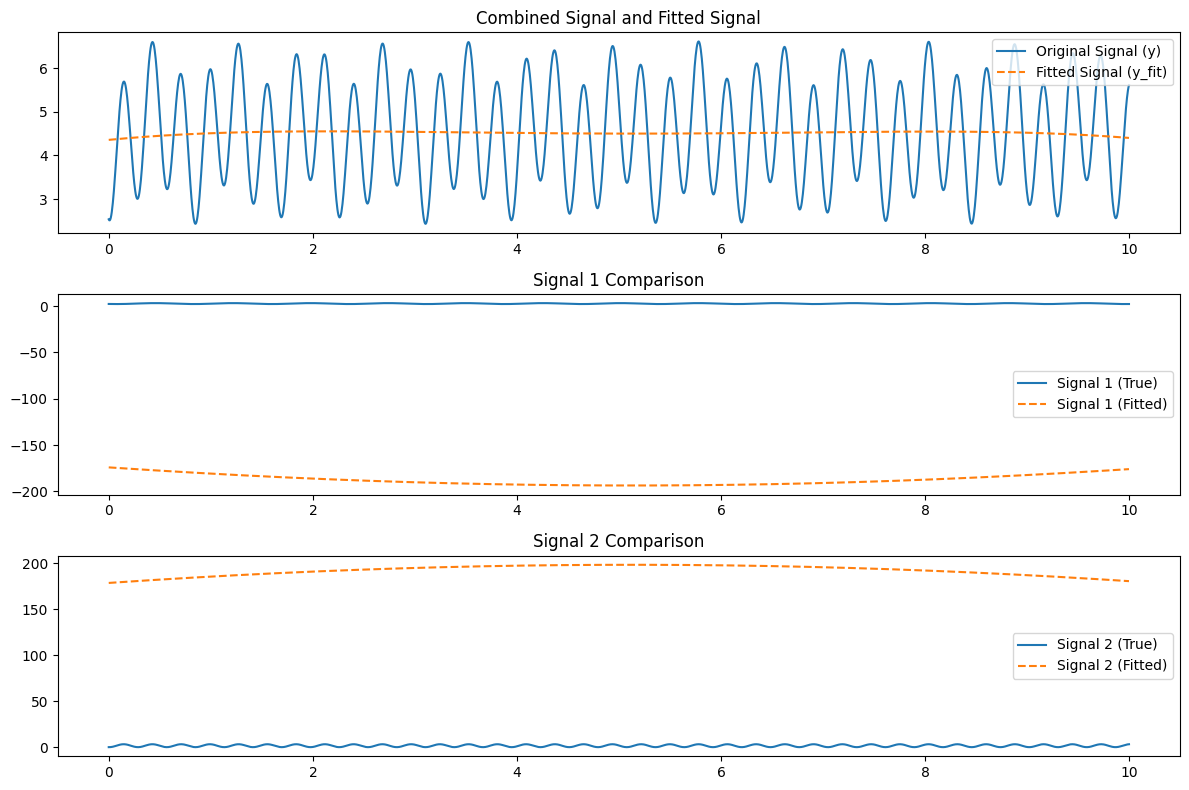

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Generate the time and signals
t = np.arange(0, 10, 0.005)

# Random data for `signal1`
A1 = 5 * np.random.rand()
f1 = 10 * np.random.rand() + 5
b1 = 20 * np.random.rand()
ceta1 = 2 * np.random.rand() * np.pi
signal1 = A1 * np.sin(f1 * t + ceta1) + b1

# Random data for `signal2`
A2 = 5 * np.random.rand()
f2 = 10 * np.random.rand() + 20
b2 = 20 * np.random.rand()
ceta2 = 2 * np.random.rand() * np.pi
signal2 = A2 * np.cos(f2 * t + ceta2) + b2

# Combined signal
y = signal1 + signal2

# Print true parameters
print(f"True A1 = {A1}, f1 = {f1}, ceta1 = {ceta1}, b1 = {b1}")
print(f"True A2 = {A2}, f2 = {f2}, ceta2 = {ceta2}, b2 = {b2}")

# Define the combined signal function for curve fitting
def combined_signal(t, A1, f1, ceta1, b1, A2, f2, ceta2, b2):
    return A1 * np.sin(f1 * t + ceta1) + b1 + A2 * np.cos(f2 * t + ceta2) + b2

# Initial guess for parameters
initial_guess = [1, 1, 0, 1, 1, 1, 0, 1]

# Fit the curve
params, _ = curve_fit(combined_signal, t, y, p0=initial_guess)

# Extract fitted parameters
A1_fit, f1_fit, ceta1_fit, b1_fit, A2_fit, f2_fit, ceta2_fit, b2_fit = params

# Print estimated parameters
print(f"Estimated A1 = {A1_fit}, f1 = {f1_fit}, ceta1 = {ceta1_fit}, b1 = {b1_fit}")
print(f"Estimated A2 = {A2_fit}, f2 = {f2_fit}, ceta2 = {ceta2_fit}, b2 = {b2_fit}")

# Plotting
plt.figure(figsize=(12, 8))

# Plot the combined signal
plt.subplot(3, 1, 1)
plt.plot(t, y, label="Original Signal (y)")
plt.plot(t, combined_signal(t, *params), label="Fitted Signal (y_fit)", linestyle="dashed")
plt.legend()
plt.title("Combined Signal and Fitted Signal")

# Plot individual signals
plt.subplot(3, 1, 2)
plt.plot(t, signal1, label="Signal 1 (True)")
plt.plot(t, params[0] * np.sin(params[1] * t + params[2]) + params[3], label="Signal 1 (Fitted)", linestyle="dashed")
plt.legend()
plt.title("Signal 1 Comparison")

plt.subplot(3, 1, 3)
plt.plot(t, signal2, label="Signal 2 (True)")
plt.plot(t, params[4] * np.cos(params[5] * t + params[6]) + params[7], label="Signal 2 (Fitted)", linestyle="dashed")
plt.legend()
plt.title("Signal 2 Comparison")

plt.tight_layout()
plt.show()
